In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

plt.style.use('ggplot')

In [2]:
df = pd.read_excel('data.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.query('Description.isna()')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [5]:
#remove all data where customer_id is NaN
df = df.query('CustomerID.notna()') \
    .reset_index(drop = True).copy()

# Calculate RFM

In [6]:
df['CustomerID'] = df['CustomerID'].astype(str)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [7]:
base_date = max(df['InvoiceDate']) + pd.Timedelta(days = 1)
df['TotalPay'] = df['Quantity']*df['UnitPrice']
df_customer = df.groupby(['CustomerID']) \
                .agg(
                    {'InvoiceDate': lambda x: (base_date-x.max()).days,
                     'InvoiceNo':'count',
                     'TotalPay':'sum'
                    })
df_customer = df_customer.rename(columns = {'InvoiceDate':'Recency',
                              'InvoiceNo':'Frequency',
                                'TotalPay':'Monetary'})
df_customer

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [8]:
df_customer.duplicated().sum()

0

<Figure size 1200x400 with 0 Axes>

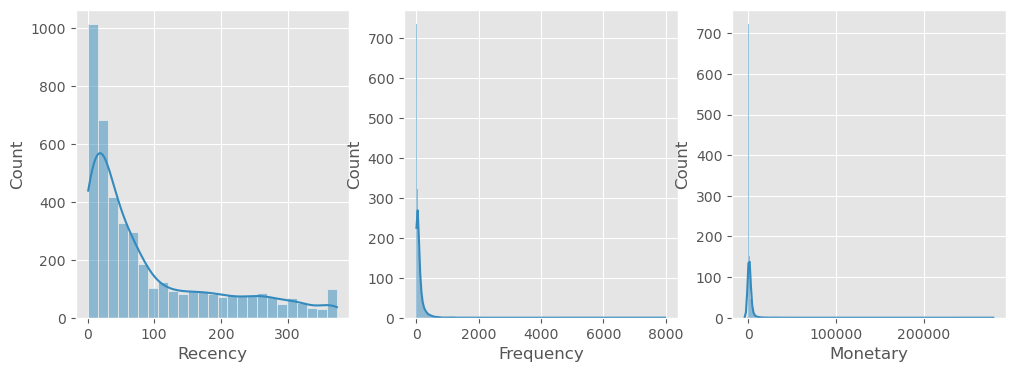

In [9]:
# Set the background color and figsize
plt.figure(figsize = (12, 4))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 7x2 subplot figure
fig, axs = plt.subplots(1, 3, figsize = (12, 4))

i = 1
# Loop through dataframe columns
for feature in df_customer.columns:
    # Create a subplot
    plt.subplot(1, 3, i)
    # Create histogram
    sns.histplot(data = df_customer, x = feature, kde = True)
    i += 1
    
# Show the plot
plt.show()

# Transform data

In [10]:
#function for analyze skewness
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(x, ax=ax[0,0], kde = True)
    sns.histplot(np.log(x), ax=ax[0,1], kde = True)
    sns.histplot(np.sqrt(x), ax=ax[1,0], kde = True)
    sns.histplot(stats.boxcox(x)[0], ax=ax[1,1], kde = True)
    plt.tight_layout()
    plt.show()
    
    print("original knew value", x.skew().round(2))
    print("log knew value", np.log(x).skew().round(2))
    print("sqrt knew value", np.sqrt(x).skew().round(2))
    print("boxcox knew value", pd.Series(stats.boxcox(x)[0]).skew().round(2))

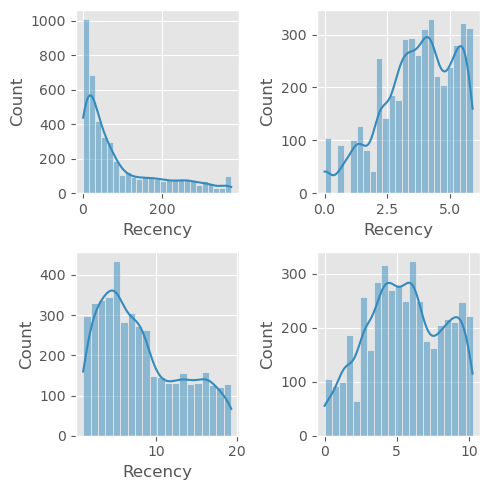

original knew value 1.25
log knew value -0.53
sqrt knew value 0.59
boxcox knew value -0.07


In [11]:
analyze_skewness(df_customer["Recency"])

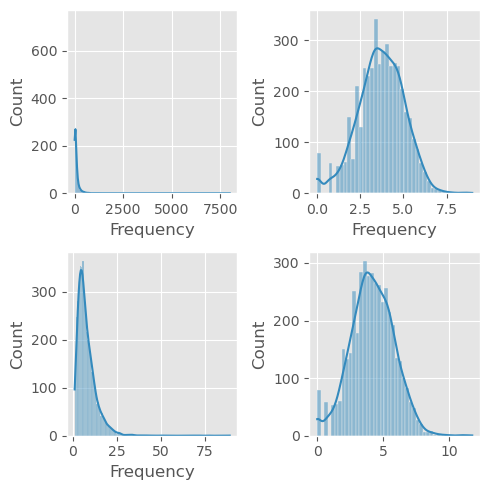

original knew value 18.15
log knew value -0.24
sqrt knew value 3.2
boxcox knew value 0.0


In [12]:
analyze_skewness(df_customer["Frequency"])

# Transform data
because Moneytary as negative value => cannot apply above method.
Final method using is cube root

In [14]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customer['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customer['Frequency'])[0]
df_customers_t['Moneytary'] = pd.Series(np.cbrt(df_customer['Monetary'])).values

In [15]:
df_customers_t

,Recency,Frequency,Moneytary
0,9.876619,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001
...,...,...,...
4367,9.454427,2.460908,5.652483
4368,8.372488,2.058202,4.323541
4369,2.496606,2.762414,5.610440
4370,1.564173,8.057611,12.795376


# Scale data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform (df_customers_t)
df_customers_t

array([[ 1.61117306, -2.09807168, -1.92564704],
       [-1.79759219,  1.15134635,  1.33054192],
       [ 0.30905346, -0.22431569,  0.50703791],
       ...,
       [-1.14097185, -0.85048403, -0.80307538],
       [-1.48869338,  2.36366091,  0.63453134],
       [-0.10466245,  0.391469  ,  0.52497099]])

In [17]:
df_customers_t = pd. DataFrame(df_customers_t, columns=['Recency', 'Frequency', 'Monetary'])
df_customers_t

,Recency,Frequency,Monetary
0,1.611173,-2.098072,-1.925647
1,-1.797592,1.151346,1.330542
2,0.309053,-0.224316,0.507038
3,-0.645121,0.423978,0.488997
4,1.560964,-0.660498,-0.536848
...,...,...,...
4367,1.453730,-1.033496,-0.794663
4368,1.050255,-1.277936,-1.060566
4369,-1.140972,-0.850484,-0.803075
4370,-1.488693,2.363661,0.634531


# Choose K by elbow

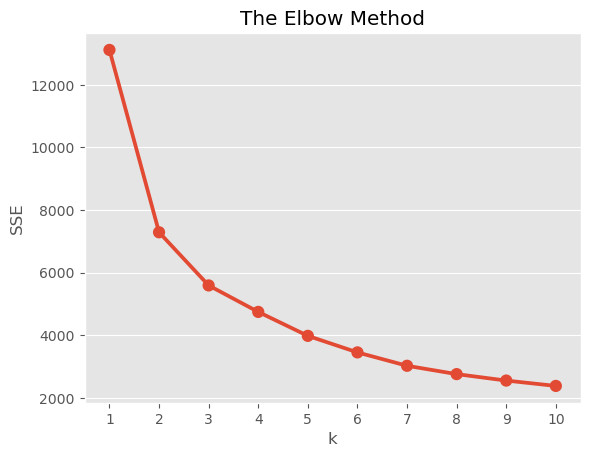

In [18]:
from sklearn.cluster import KMeans

sse = {}

for k in range (1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot (x = list(sse.keys()), y = list(sse.values()))
plt.show()

# Build model

In [19]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(df_customers_t)

KMeans(n_clusters=3, random_state=42)

In [20]:
# Done create model. Now add cluster name to original df
df_customer['Cluster'] = model.labels_
df_customer.head(10)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1
12352.0,36,95,1545.41,2
12353.0,204,4,89.00,1
12354.0,232,58,1079.40,1
12355.0,214,13,459.40,1


In [30]:
# Finally: print out parameter of 3 clusters
final = df_customer.groupby('Cluster').agg(
        {'Recency':'mean',
        'Frequency' : 'mean',
        'Monetary' : 'mean'
        }).round(2)
final

,Recency,Frequency,Monetary
Cluster,,,
0,17.88,312.26,7356.52
1,185.51,19.15,351.30
2,42.63,67.12,1003.74


In [26]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

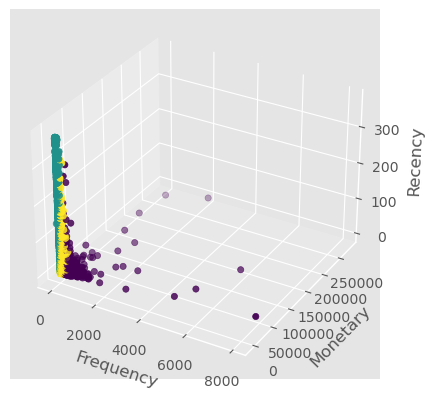

In [46]:
ax = plt.axes(projection='3d')

#scatter datas
zdata = df_customer['Recency']
xdata = df_customer['Frequency']
ydata = df_customer['Monetary']
marker = df_customer['Cluster']
ax.scatter3D(xdata, ydata, zdata, c = marker)

ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Monetary', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)

plt.show()